In [100]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import json

os.chdir('f:/GitHub/icms-prediction/')

os.makedirs('results', exist_ok=True)

assert os.path.exists('data') == True, 'data folder not found. Please create a data folder with data file inside.'

In [40]:
file_name = 'Mini-Consolidado.xlsx'
all_series = pd.read_excel(f'data/{file_name}', sheet_name='Series')
all_series.head()   

,ANO,MES,ARRECADACAO_ICMS_RJ,IPVA_RJ,ITCD_RJ,TOTAL_ARR_OUTROS_TRIBUTOS_RJ,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_RJ,ENERGIA_CONSUMO_RESIDENCIAL_RJ,ENERGIA_CONSUMO_INDUSTRIAL_RJ,...,PETROLEO_CONSUMO_DEMAIS_DERIVADOS,PETROLEO_CONSUMO_TOTAL,VOLUME_VENDAS_VAREJO_TOTAL_RJ,VOLUME_VENDAS_VAREJO_COMBUSTIVEIS_RJ,VOLUME_VENDAS_VAREJO_MERCADOS_RJ,VOLUME_VENDAS_VAREJO_LOJAS_RJ,VOLUME_VENDAS_VAREJO_MOVEIS_ELETRODOMESTICOS_RJ,VOLUME_VENDAS_VAREJO_AUTOMOVEIS_RJ,VOLUME_VENDAS_VAREJO_SUPERMERCADOS_RJ,CESTA_BASICA_RJ
0,1997.0,1.0,447203229.0,40381787.0,2874105.0,49312849.0,496516078.0,NaN,NaN,NaN,...,75,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997.0,2.0,410243308.0,60099167.0,2382921.0,67195366.0,477438674.0,NaN,NaN,NaN,...,74,1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997.0,3.0,393689067.0,86741084.0,3504492.0,95996559.0,489685626.0,NaN,NaN,NaN,...,78,1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997.0,4.0,416990847.0,48394741.0,3676037.0,61875162.0,478866009.0,NaN,NaN,NaN,...,79,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997.0,5.0,431412599.0,24760492.0,3468223.0,34768442.0,466181041.0,NaN,NaN,NaN,...,78,1376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
all_series = all_series.dropna()
just_series = all_series.drop(['ANO', 'MES'], axis=1)

TOTAL_RECEITA_TRIBUTARIA_RJ para ICMS - Distância: 12.144201684324544


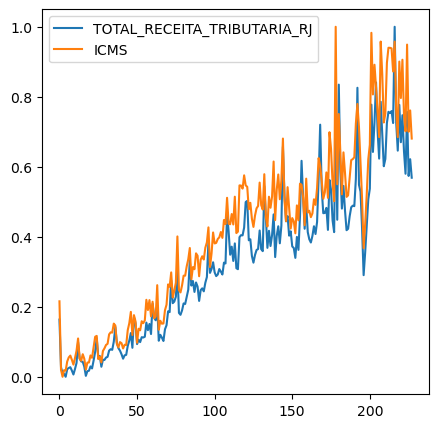

ENERGIA_CONSUMO_TOTAL_SUDESTE para ICMS - Distância: 13.792239227862686


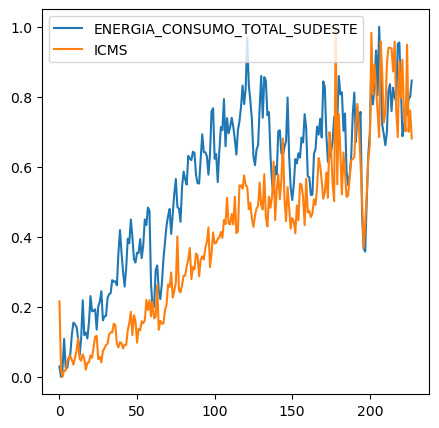

ENERGIA_CONSUMO_RESIDENCIAL_SUDESTE para ICMS - Distância: 12.559081628510137


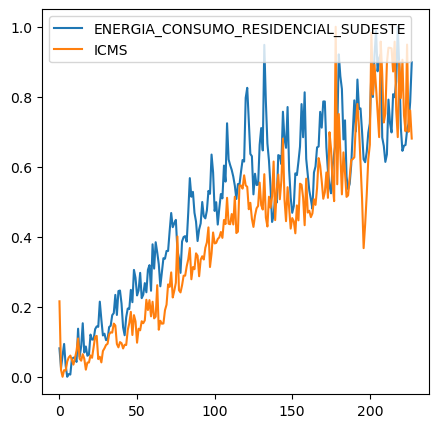

PETROLEO_PRODUCAO_OLEO_BRUTO para ICMS - Distância: 10.890151835468995


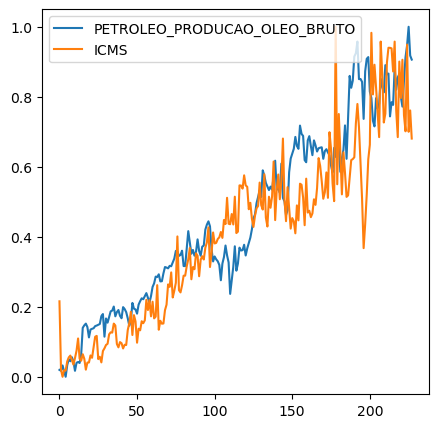

PETROLEO_PRODUCAO_TOTAL para ICMS - Distância: 11.187559183135663


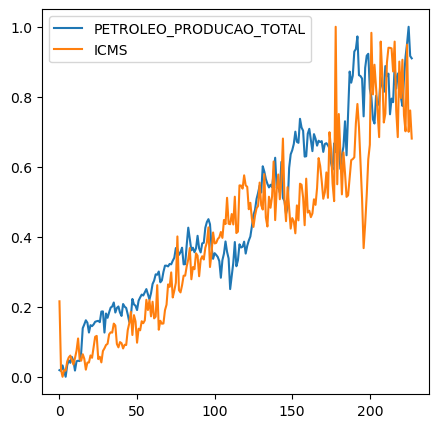

PETROLEO_PRODUCAO_GAS_NATURAL para ICMS - Distância: 9.84834901148502


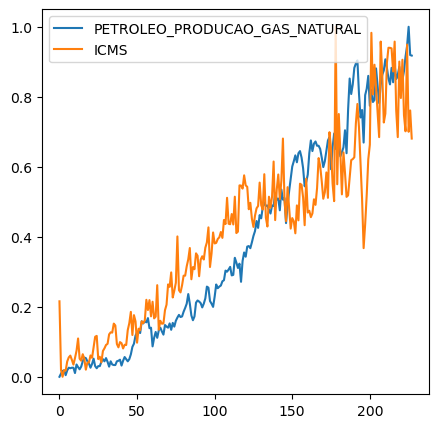

CESTA_BASICA_RJ para ICMS - Distância: 10.474565110183093


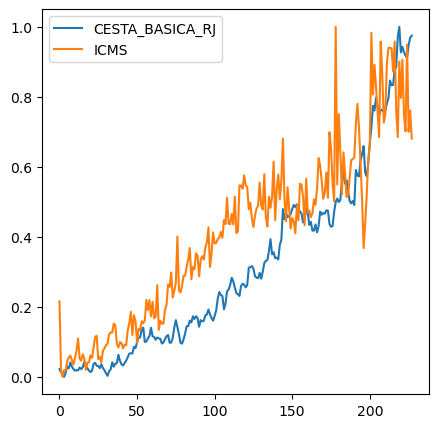

In [98]:
columns = just_series.columns
matriz = just_series.values
matriz = MinMaxScaler().fit_transform(matriz)
entradas = matriz[:, 1:]
saida = matriz[:, 0]  
distance_dict = {}  
for i in range(0, len(entradas[1])):
    x = entradas[:, i]
    distance, path = fastdtw(x, saida, dist=2)
    distance_dict[columns[i+1]] = distance
    if distance < 15:
        plt.figure(figsize=(5, 5))
        plt.plot(x, label=f'{columns[i+1]}')
        plt.plot(saida, label='ICMS')
        plt.legend()
        print(f'{columns[i+1]} para ICMS - Distância: {distance}')
        # plt.savefig(f'results/{columns[i+1]}.png')
        # plt.close()
        plt.show()

In [89]:
sorted_dict = dict(sorted(distance_dict.items(), key=lambda item: item[1]))
print('10 menores distâncias:')
for i, (k, v) in enumerate(sorted_dict.items()):
    print(f'{k} para ICMS - Distância: {v}')
    if i == 9:
        break

10 menores distâncias:
PETROLEO_PRODUCAO_GAS_NATURAL para ICMS - Distância: 9.84834901148502
CESTA_BASICA_RJ para ICMS - Distância: 10.474565110183093
PETROLEO_PRODUCAO_OLEO_BRUTO para ICMS - Distância: 10.890151835468995
PETROLEO_PRODUCAO_TOTAL para ICMS - Distância: 11.187559183135663
TOTAL_RECEITA_TRIBUTARIA_RJ para ICMS - Distância: 12.144201684324544
ENERGIA_CONSUMO_RESIDENCIAL_SUDESTE para ICMS - Distância: 12.559081628510137
ENERGIA_CONSUMO_TOTAL_SUDESTE para ICMS - Distância: 13.792239227862686
PETROLEO_CONSUMO_GASOLINA para ICMS - Distância: 15.556387135507583
PETROLEO_CONSUMO_TOTAL para ICMS - Distância: 15.97342733638223
PETROLEO_CONSUMO_OLEO_DIESEL para ICMS - Distância: 16.34113835099994


In [102]:
with open('results/normalized_distance.json', 'w') as fp:
    json.dump(sorted_dict, fp, indent=4)

In [104]:
best_candidates = list(sorted_dict.keys())[:10]
best_candidates.insert(0, 'ARRECADACAO_ICMS_RJ')
best_series = all_series[best_candidates]
best_series.head()

,ARRECADACAO_ICMS_RJ,PETROLEO_PRODUCAO_GAS_NATURAL,CESTA_BASICA_RJ,PETROLEO_PRODUCAO_OLEO_BRUTO,PETROLEO_PRODUCAO_TOTAL,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_RESIDENCIAL_SUDESTE,ENERGIA_CONSUMO_TOTAL_SUDESTE,PETROLEO_CONSUMO_GASOLINA,PETROLEO_CONSUMO_TOTAL,PETROLEO_CONSUMO_OLEO_DIESEL
84,1.668433e+09,0.280,166.88,1457,1517,1.971915e+09,3694.0,14930.0,287,1211,573
85,9.665576e+08,0.286,161.91,1452,1513,1.261818e+09,3512.0,14715.0,283,1217,585
86,8.956950e+08,0.291,158.57,1480,1542,1.176546e+09,3629.0,14904.0,294,1364,690
87,9.638028e+08,0.292,153.59,1449,1510,1.164562e+09,3734.0,15501.0,311,1363,682
88,9.587682e+08,0.283,160.76,1421,1482,1.121692e+09,3537.0,14907.0,278,1262,627
